In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

Activated /Users/Shane/Dropbox/GitHub/quantecon-notebooks-julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [2]:
using LinearAlgebra, Statistics
using QuantEcon, QuadGK, FastGaussQuadrature, Distributions, Expectations
using Interpolations, Plots, LaTeXStrings, ProgressMeter

┌ Info: Precompiling QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1278
┌ Info: Precompiling FastGaussQuadrature [442a2c76-b920-505d-bb47-c5924d526838]
└ @ Base loading.jl:1278
┌ Info: Precompiling Expectations [2fe49d83-0758-5602-8f54-1f90ad0d522b]
└ @ Base loading.jl:1278
┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1278
┌ Info: Precompiling ProgressMeter [92933f4c-e287-5a05-a399-4b506db050ca]
└ @ Base loading.jl:1278


In [3]:
?quadgk

search: quadgk quadgk! QuadGK QuadratureAlgorithm ExplicitQuadratureAlgorithm



```
quadgk(f, a,b,c...; rtol=sqrt(eps), atol=0, maxevals=10^7, order=7, norm=norm)
```

Numerically integrate the function `f(x)` from `a` to `b`, and optionally over additional intervals `b` to `c` and so on. Keyword options include a relative error tolerance `rtol` (if `atol==0`, defaults to `sqrt(eps)` in the precision of the endpoints), an absolute error tolerance `atol` (defaults to 0), a maximum number of function evaluations `maxevals` (defaults to `10^7`), and the `order` of the integration rule (defaults to 7).

Returns a pair `(I,E)` of the estimated integral `I` and an estimated upper bound on the absolute error `E`. If `maxevals` is not exceeded then `E <= max(atol, rtol*norm(I))` will hold. (Note that it is useful to specify a positive `atol` in cases where `norm(I)` may be zero.)

The endpoints `a` et cetera can also be complex (in which case the integral is performed over straight-line segments in the complex plane). If the endpoints are `BigFloat`, then the integration will be performed in `BigFloat` precision as well.

!!! note
    It is advisable to increase the integration `order` in rough proportion to the precision, for smooth integrands.


More generally, the precision is set by the precision of the integration endpoints (promoted to floating-point types).

The integrand `f(x)` can return any numeric scalar, vector, or matrix type, or in fact any type supporting `+`, `-`, multiplication by real values, and a `norm` (i.e., any normed vector space). Alternatively, a different norm can be specified by passing a `norm`-like function as the `norm` keyword argument (which defaults to `norm`).

!!! note
    Only one-dimensional integrals are provided by this function. For multi-dimensional integration (cubature), there are many different algorithms (often much better than simple nested 1d integrals) and the optimal choice tends to be very problem-dependent. See the Julia external-package listing for available algorithms for multidimensional integration or other specialized tasks (such as integrals of highly oscillatory or singular functions).


The algorithm is an adaptive Gauss-Kronrod integration technique: the integral in each interval is estimated using a Kronrod rule (`2*order+1` points) and the error is estimated using an embedded Gauss rule (`order` points). The interval with the largest error is then subdivided into two intervals and the process is repeated until the desired error tolerance is achieved.

These quadrature rules work best for smooth functions within each interval, so if your function has a known discontinuity or other singularity, it is best to subdivide your interval to put the singularity at an endpoint. For example, if `f` has a discontinuity at `x=0.7` and you want to integrate from 0 to 1, you should use `quadgk(f, 0,0.7,1)` to subdivide the interval at the point of discontinuity. The integrand is never evaluated exactly at the endpoints of the intervals, so it is possible to integrate functions that diverge at the endpoints as long as the singularity is integrable (for example, a `log(x)` or `1/sqrt(x)` singularity).

For real-valued endpoints, the starting and/or ending points may be infinite. (A coordinate transformation is performed internally to map the infinite interval to a finite one.)


In [25]:
using FastGaussQuadrature
x, w = gausslegendre(100_000); # i.e. find 100,000 nodes

# integrates f(x) = x^2 from -1 to 1
f(x) = x^2
@show w ⋅ f.(x); # calculate integral


w ⋅ f.(x) = 0.6666666666666665


In [14]:
?gausslegendre

search: gausslegendre



```
gausslegendre(n::Integer) -> Tuple{Vector{Float64},Vector{Float64}}
```

Return nodes and weights of [Gauss-Legendre quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature).

$$
\int_{-1}^{1} f(x) dx \approx \sum_{i=1}^{n} w_i f(x_i)
$$

# Examples

```jldoctest; setup = :(using FastGaussQuadrature, LinearAlgebra)
julia> x, w = gausslegendre(3);

julia> f(x) = x^4;

julia> I = dot(w, f.(x));

julia> I ≈ 2/5
true
```


In [31]:
using Distributions, Expectations
dist = Normal()
E = expectation(dist)
f(x) = x
@show E(f) #i.e. identity


IterableExpectation{Array{Float64,1},Array{Float64,1}}([-9.706235997359522, -8.680837722732212, -7.825051744352812, -7.055396866960293, -6.339997686869597, -5.662381850082874, -5.012600596486518, -4.384020365898052, -3.7718944231592366, -3.1726346394204032  …  3.1726346394204032, 3.7718944231592366, 4.384020365898052, 5.012600596486518, 5.662381850082874, 6.339997686869597, 7.055396866960293, 7.825051744352812, 8.680837722732212, 9.706235997359522], [1.6408069991319721e-21, 1.5855609449663175e-17, 1.6240801299724176e-14, 4.5734258713261955e-12, 5.178459467189773e-10, 2.88217515404765e-8, 8.90908886862124e-7, 1.6579981630673396e-5, 0.00019651294398482591, 0.0015447073398660851  …  0.0015447073398660851, 0.00019651294398482591, 1.6579981630673396e-5, 8.90908886862124e-7, 2.88217515404765e-8, 5.178459467189773e-10, 4.5734258713261955e-12, 1.6240801299724176e-14, 1.5855609449663175e-17, 1.6408069991319721e-21])

In [32]:
?expectation

search: expectation Expectation Expectations IterableExpectation



```
expectation(dist::DiscreteUnivariateDistribution, alg::Type{FiniteDiscrete} = FiniteDiscrete; kwargs...) = _expectation(dist, alg; kwargs...)
```

Dispatcher for (finite) discrete univariate expectations.

---

```
expectation(dist::ContinuousUnivariateDistribution, alg::Type{<:QuadratureAlgorithm} = Gaussian; kwargs...) = _expectation(dist, alg; kwargs...)
```

Dispatcher for continuous univariate expectations.

---

```
expectation(dist::ContinuousUnivariateDistribution, nodes, alg::Type{<:ExplicitQuadratureAlgorithm} = Trapezoidal; kwargs...)  = _expectation(dist, nodes, alg; kwargs...)
```

Dispatcher for distributions with user-defined nodes.

---

```
expectation(f::Function, dist::DiscreteUnivariateDistribution, alg::Type{FiniteDiscrete} = FiniteDiscrete; kwargs...) = expectation(dist, alg; kwargs...)(f)
```

Convenience function for (finite) discrete univariate distributions.

---

```
expectation(f::Function, dist::ContinuousUnivariateDistribution, alg::Type{<:QuadratureAlgorithm} = Gaussian; kwargs...) = expectation(dist, alg; kwargs...)(f)
```

Convenience function for continuous univariate distributions.

---

```
expectation(f::Function, dist::ContinuousUnivariateDistribution, nodes::AbstractArray, alg::Type{<:ExplicitQuadratureAlgorithm} = Trapezoidal; kwargs...) = expectation(dist, nodes, alg; kwargs...)(f)
```

Convenience function for continuous univariate distributions with user-supplied nodes.


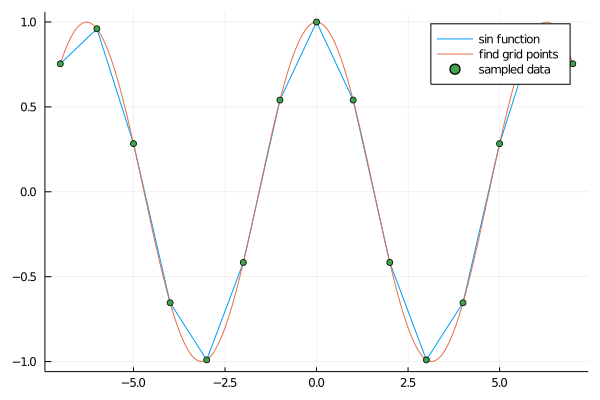

In [45]:
using Interpolations
using Plots
gr(fmt=:png);

x = -7:7 # x points, coase grid
y = cos.(x) # corresponding y points

xf = -7:0.1:7        # fine grid
plot(x, y, label = "sin function")
plot!(xf,cos.(xf),label = "find grid points")
scatter!(x, y, label = "sampled data", markersize = 4)

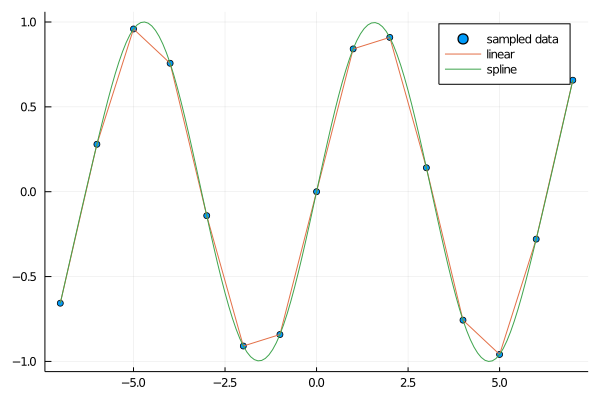

In [43]:
li = LinearInterpolation(x, y)
li_spline = CubicSplineInterpolation(x, y)
scatter(x, y, label = "sampled data", markersize = 4)
plot!(xf, li.(xf), label = "linear")
plot!(xf, li_spline.(xf), label = "spline")